In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [16]:
file_path = r'D:\project\diabetes prediction\diabetes.csv'
data = pd.read_csv(file_path)

# Explore Our Data 

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
data.duplicated().sum()

0

In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


# Analysis 

In [22]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

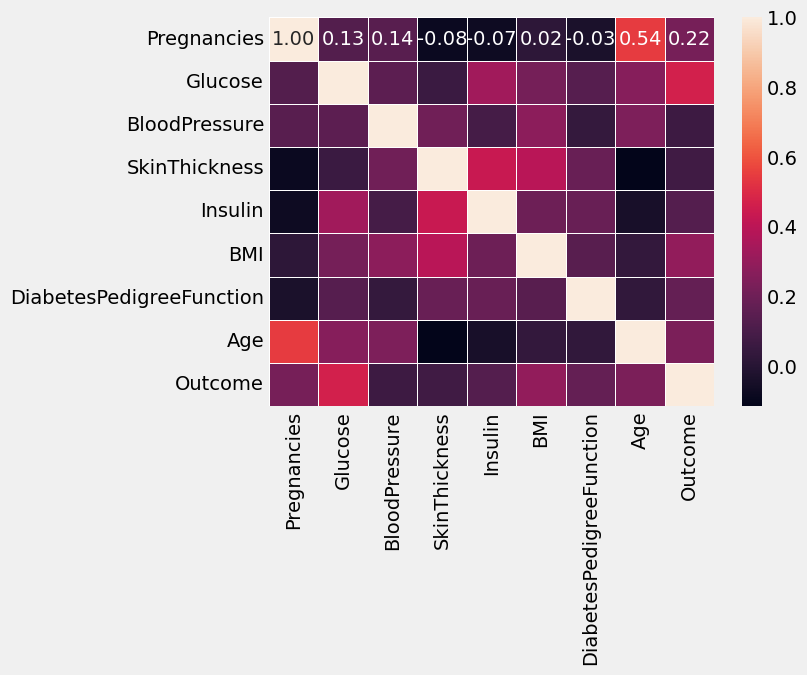

In [23]:
sns.heatmap(data.corr(),linewidth=.5,annot=True,fmt='0.2f')

<Axes: xlabel='Outcome', ylabel='count'>

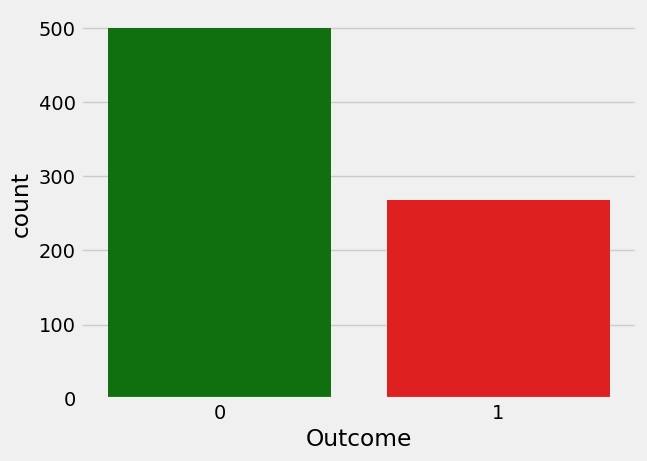

In [24]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

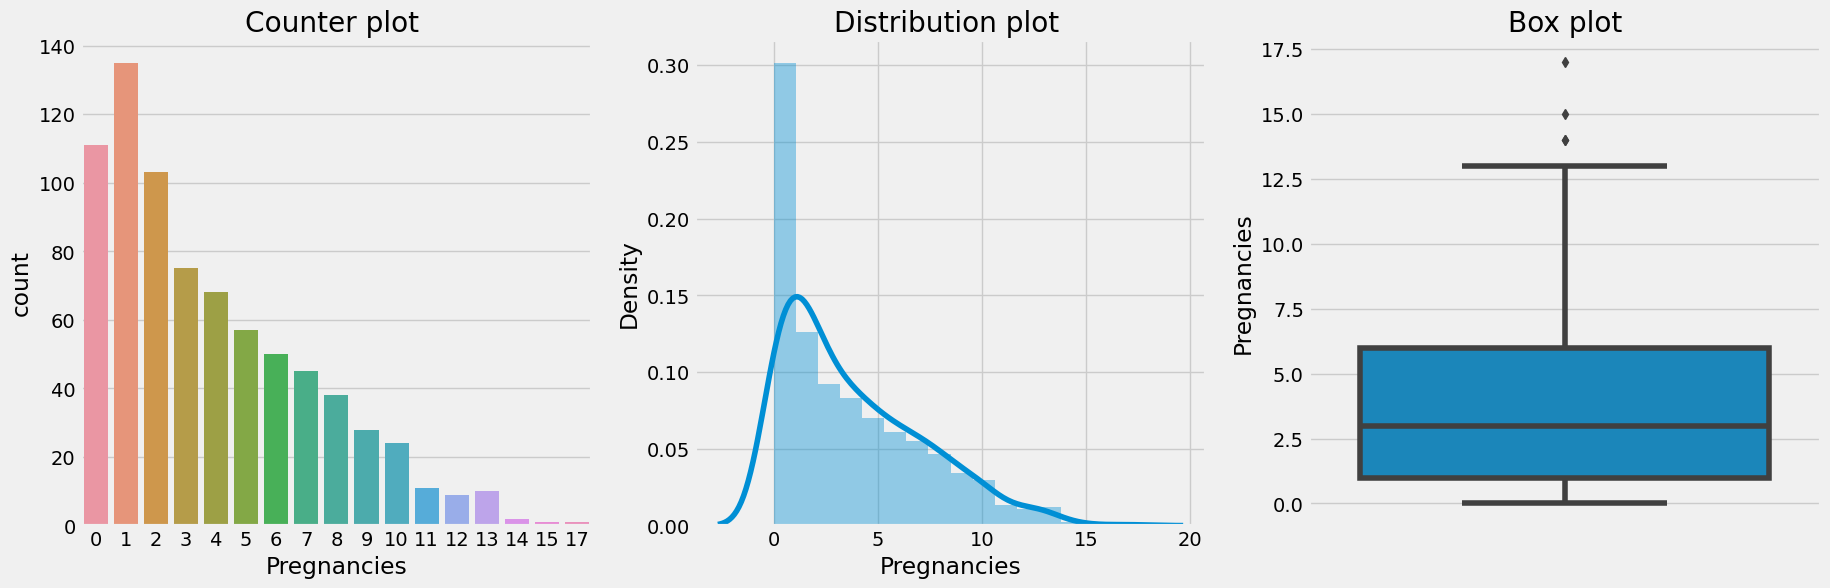

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter plot ')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution plot ')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=data['Pregnancies'])

plt.show()

<Axes: >

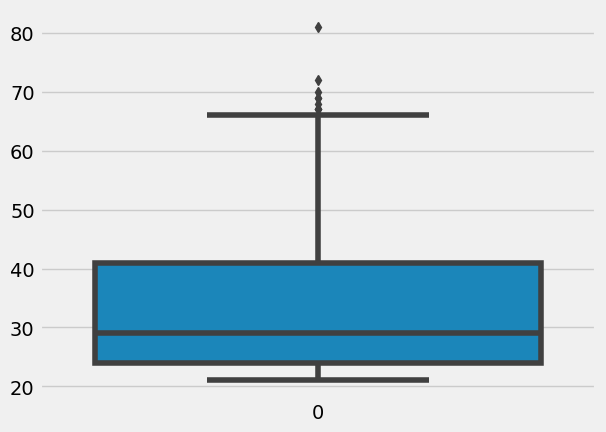

In [26]:
sns.boxplot(data['Age'])

# create Model

In [27]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# model

In [29]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)

In [30]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [31]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is :',accuracy,'\n','recall is :',recall,'\n','f1 score is :',f1)        

LogisticRegression()
accuracy is : 0.7857142857142857 
 recall is : 0.7333333333333333 
 f1 score is : 0.6666666666666666


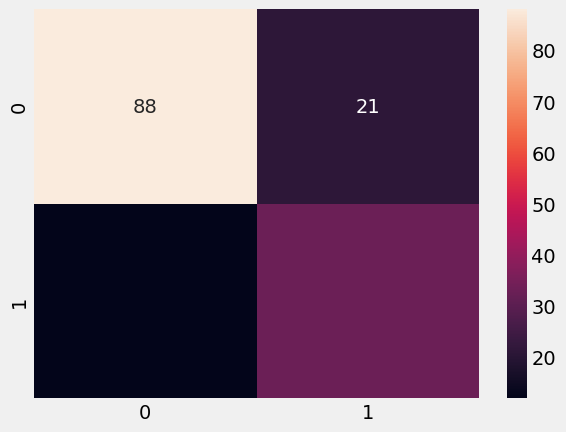

In [32]:
cal(model1)

SVC()
accuracy is : 0.8116883116883117 
 recall is : 0.8571428571428571 
 f1 score is : 0.6741573033707865


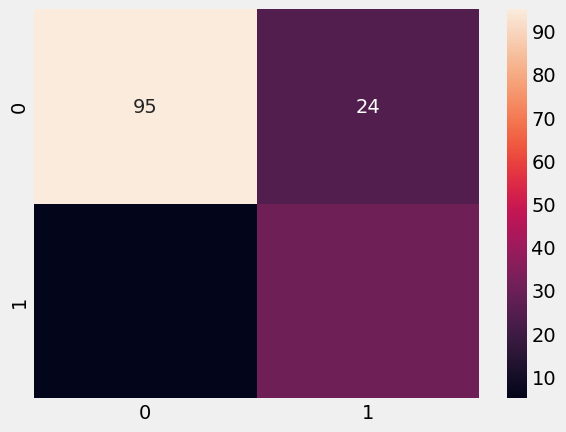

In [33]:
cal(model2)

RandomForestClassifier()
accuracy is : 0.8376623376623377 
 recall is : 0.8536585365853658 
 f1 score is : 0.7368421052631579


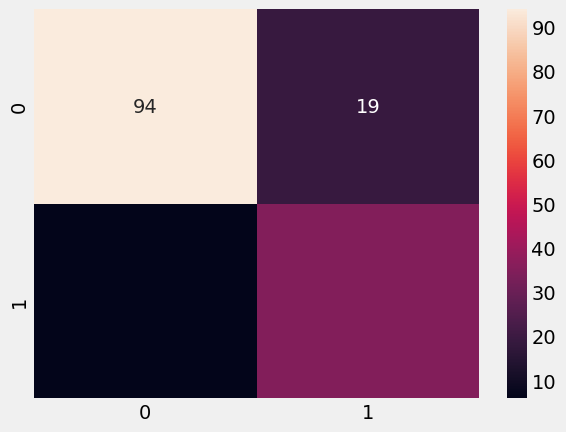

In [34]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.7532467532467533 
 recall is : 0.7 
 f1 score is : 0.5957446808510639


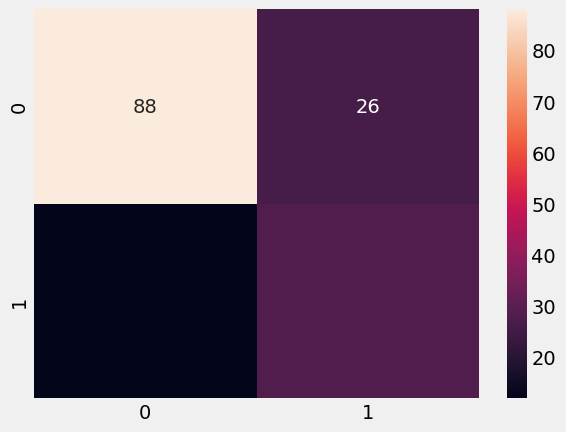

In [35]:
cal(model4)

In [36]:
result1

[0.7857142857142857,
 0.8116883116883117,
 0.8376623376623377,
 0.7532467532467533]

In [37]:
result2

[0.7333333333333333, 0.8571428571428571, 0.8536585365853658, 0.7]

In [38]:
final=pd.DataFrame({'Algorithm': columns,'Accuracies' : result1,'Recall' : result2,'F1_Score' : result3})
final

,Algorithm,Accuracies,Recall,F1_Score
0,LogisticRegression,0.785714,0.733333,0.666667
1,SVC,0.811688,0.857143,0.674157
2,RandomForestClassifier,0.837662,0.853659,0.736842
3,GradientBoostingClassifier,0.753247,0.700000,0.595745


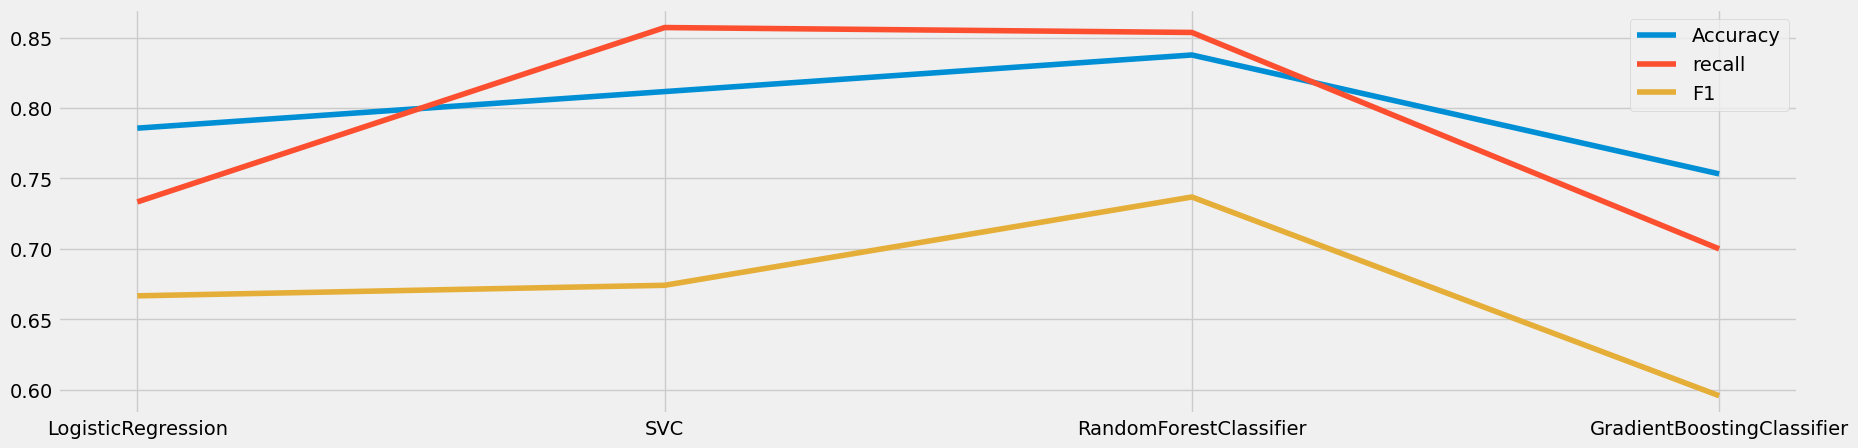

In [39]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final.Algorithm,result1,label='Accuracy')
plt.plot(final.Algorithm,result2,label='recall')
plt.plot(final.Algorithm,result3,label='F1')
plt.legend()
plt.show()